In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import yass
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from yass.visual.run import VisualizerOG
from yass import set_config
from yass import read_config
from yass.reader import READER

/home/jai/yass/src/yass/visual/run.py:10: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from mpl_toolkits.axes_grid1.colorbar import colorbar


ModuleNotFoundError: No module named 'matplotlib_venn'

In [2]:
# Path to folder where all tmp data + venn data will be stored
save_dir = '/ssd/nishchal/neuropixel/alltmp_kevin_julien/'   
if not os.path.exists(save_dir):
    os.makedirs(save_dir) 
# Path to YASS config file
fname_config = '/ssd/nishchal/neuropixel/config.yaml'

# Path to spike train from spike sorter 1 (blue)
fname_spiketrain1 = '/ssd/nishchal/neuropixel/tmp/spike_train.npy'

# Path to spike train from spike sorter 2 (red)
fname_spiketrain2 = '/ssd/nishchal/neuropixel/neuropixel_50_chan/spiketrain.npy'

# Path to templates from spike sorter 1 (blue)
fname_templates1 = '/ssd/nishchal/neuropixel/tmp/templates.npy'

# Path to templates from spike sorter 2 (red)
fname_templates2 = '/ssd/nishchal/neuropixel/only_plots/template2_computation/templates.npy'

# Path to shifts if using YASS spiketrain
fname_shifts1 = '/ssd/nishchal/neuropixel/tmp/final_deconv/deconv/shifts.npy'

# Path to scales if using YASS spiketrain
fname_scales1 =  '/ssd/nishchal/neuropixel/tmp/final_deconv/deconv/scales.npy'

# Path to standardized pre processed recording 
recording_path = '/ssd/nishchal/neuropixel/tmp/preprocess/standardized.bin'

# Path to residuals
residual_path = '/ssd/nishchal/neuropixel/tmp/final_deconv/residual/residual.bin'

# data type for the recording (Default coming out of YASS is float32)
recording_dtype = 'float32'

# chunks of the data (if you would like to visualize different venn plots for different 2 min chunks of the data)
chunks = 1

In [3]:
CONFIG = set_config(fname_config, save_dir)
reader = READER(recording_path, recording_dtype, CONFIG)
reader_resid = READER(residual_path, recording_dtype, CONFIG)

/home/nischal/anaconda3/envs/yass/lib/python3.6/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/home/nischal/anaconda3/envs/yass/lib/python3.6/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


In [4]:
## Create Analysis Object 
cr = VisualizerOG(fname_spiketrain1, 
                 recording_path, 
                 recording_dtype,
                 CONFIG, 
                 save_dir,
                 fname_templates = fname_templates1,  #You can choose to send in pre computed file locations for each of these
                 fname_residual = residual_path,      # When running it for YASS select the files created in the tmp folder
                 fname_shifts = fname_shifts1,        # THe four arguments can be set to None if you'd like to calculate everything 
                 fname_scales = fname_scales1)        # from scratch. 

In [5]:
## You can use the above object for creating full population level summary
cr.population_level_plot()

In [ ]:
## Or individual plots for all neurons (Creates 5 plots for each neuron - Waveforms, templates, template space neighbours, xcorr space neighbours)
cr.individual_level_plot()

In [8]:
## You can add a comparison functionality to this by calling (This basically adds details from second sort to the object)
cr.compare(fname_spiketrain2, 
           fname_templates2 = fname_templates2,
           fname_shifts2 = None,                       # If you have these files handy send them in
           fname_scales2 = None,                       # otherwise default values for shifts and scales will be used
           fname_residual = None)

## Matches neurons from sort 1 and sort 2 based on template similarities and spike train overlap


  8%|▊         | 29/386 [00:00<00:01, 288.30it/s]

run matching
Template 1 Shape: (72, 121, 50)
Template 2 Shape: (62, 121, 50)
386 candidate pairs



100%|██████████| 386/386 [00:01<00:00, 335.06it/s]

100%|██████████| 54/54 [00:11<00:00,  4.66it/s]


compute soft assignment 2
# of chunks:  300



0it [00:00, ?it/s]
5it [00:00, 44.15it/s]
10it [00:00, 44.30it/s]
15it [00:00, 44.11it/s]
20it [00:00, 44.29it/s]
25it [00:00, 45.21it/s]
30it [00:00, 46.03it/s]
35it [00:00, 46.61it/s]
40it [00:00, 46.93it/s]
45it [00:00, 47.17it/s]
50it [00:01, 47.59it/s]
55it [00:01, 47.76it/s]
60it [00:01, 47.67it/s]
65it [00:01, 47.74it/s]
70it [00:01, 47.87it/s]
75it [00:01, 47.83it/s]
80it [00:01, 47.81it/s]
85it [00:01, 47.87it/s]
90it [00:01, 47.98it/s]
95it [00:02, 47.80it/s]
100it [00:02, 47.88it/s]
105it [00:02, 47.84it/s]
110it [00:02, 47.76it/s]
115it [00:02, 47.71it/s]
120it [00:02, 47.77it/s]
125it [00:02, 47.72it/s]
130it [00:02, 45.96it/s]
135it [00:02, 44.95it/s]
140it [00:02, 44.53it/s]
145it [00:03, 45.27it/s]
150it [00:03, 45.95it/s]
155it [00:03, 46.44it/s]
160it [00:03, 46.69it/s]
165it [00:03, 47.03it/s]
170it [00:03, 47.22it/s]
175it [00:03, 47.26it/s]
180it [00:03, 47.59it/s]
185it [00:03, 46.40it/s]
190it [00:04, 45.11it/s]
195it [00:04, 43.79it/s]
200it [00:04, 43.61it/s]


Total residual time:  6.487265586853027



100%|██████████| 300/300 [00:06<00:00, 44.87it/s]


compute mad 1
compute mad 2
compute xcorr 2


31 38


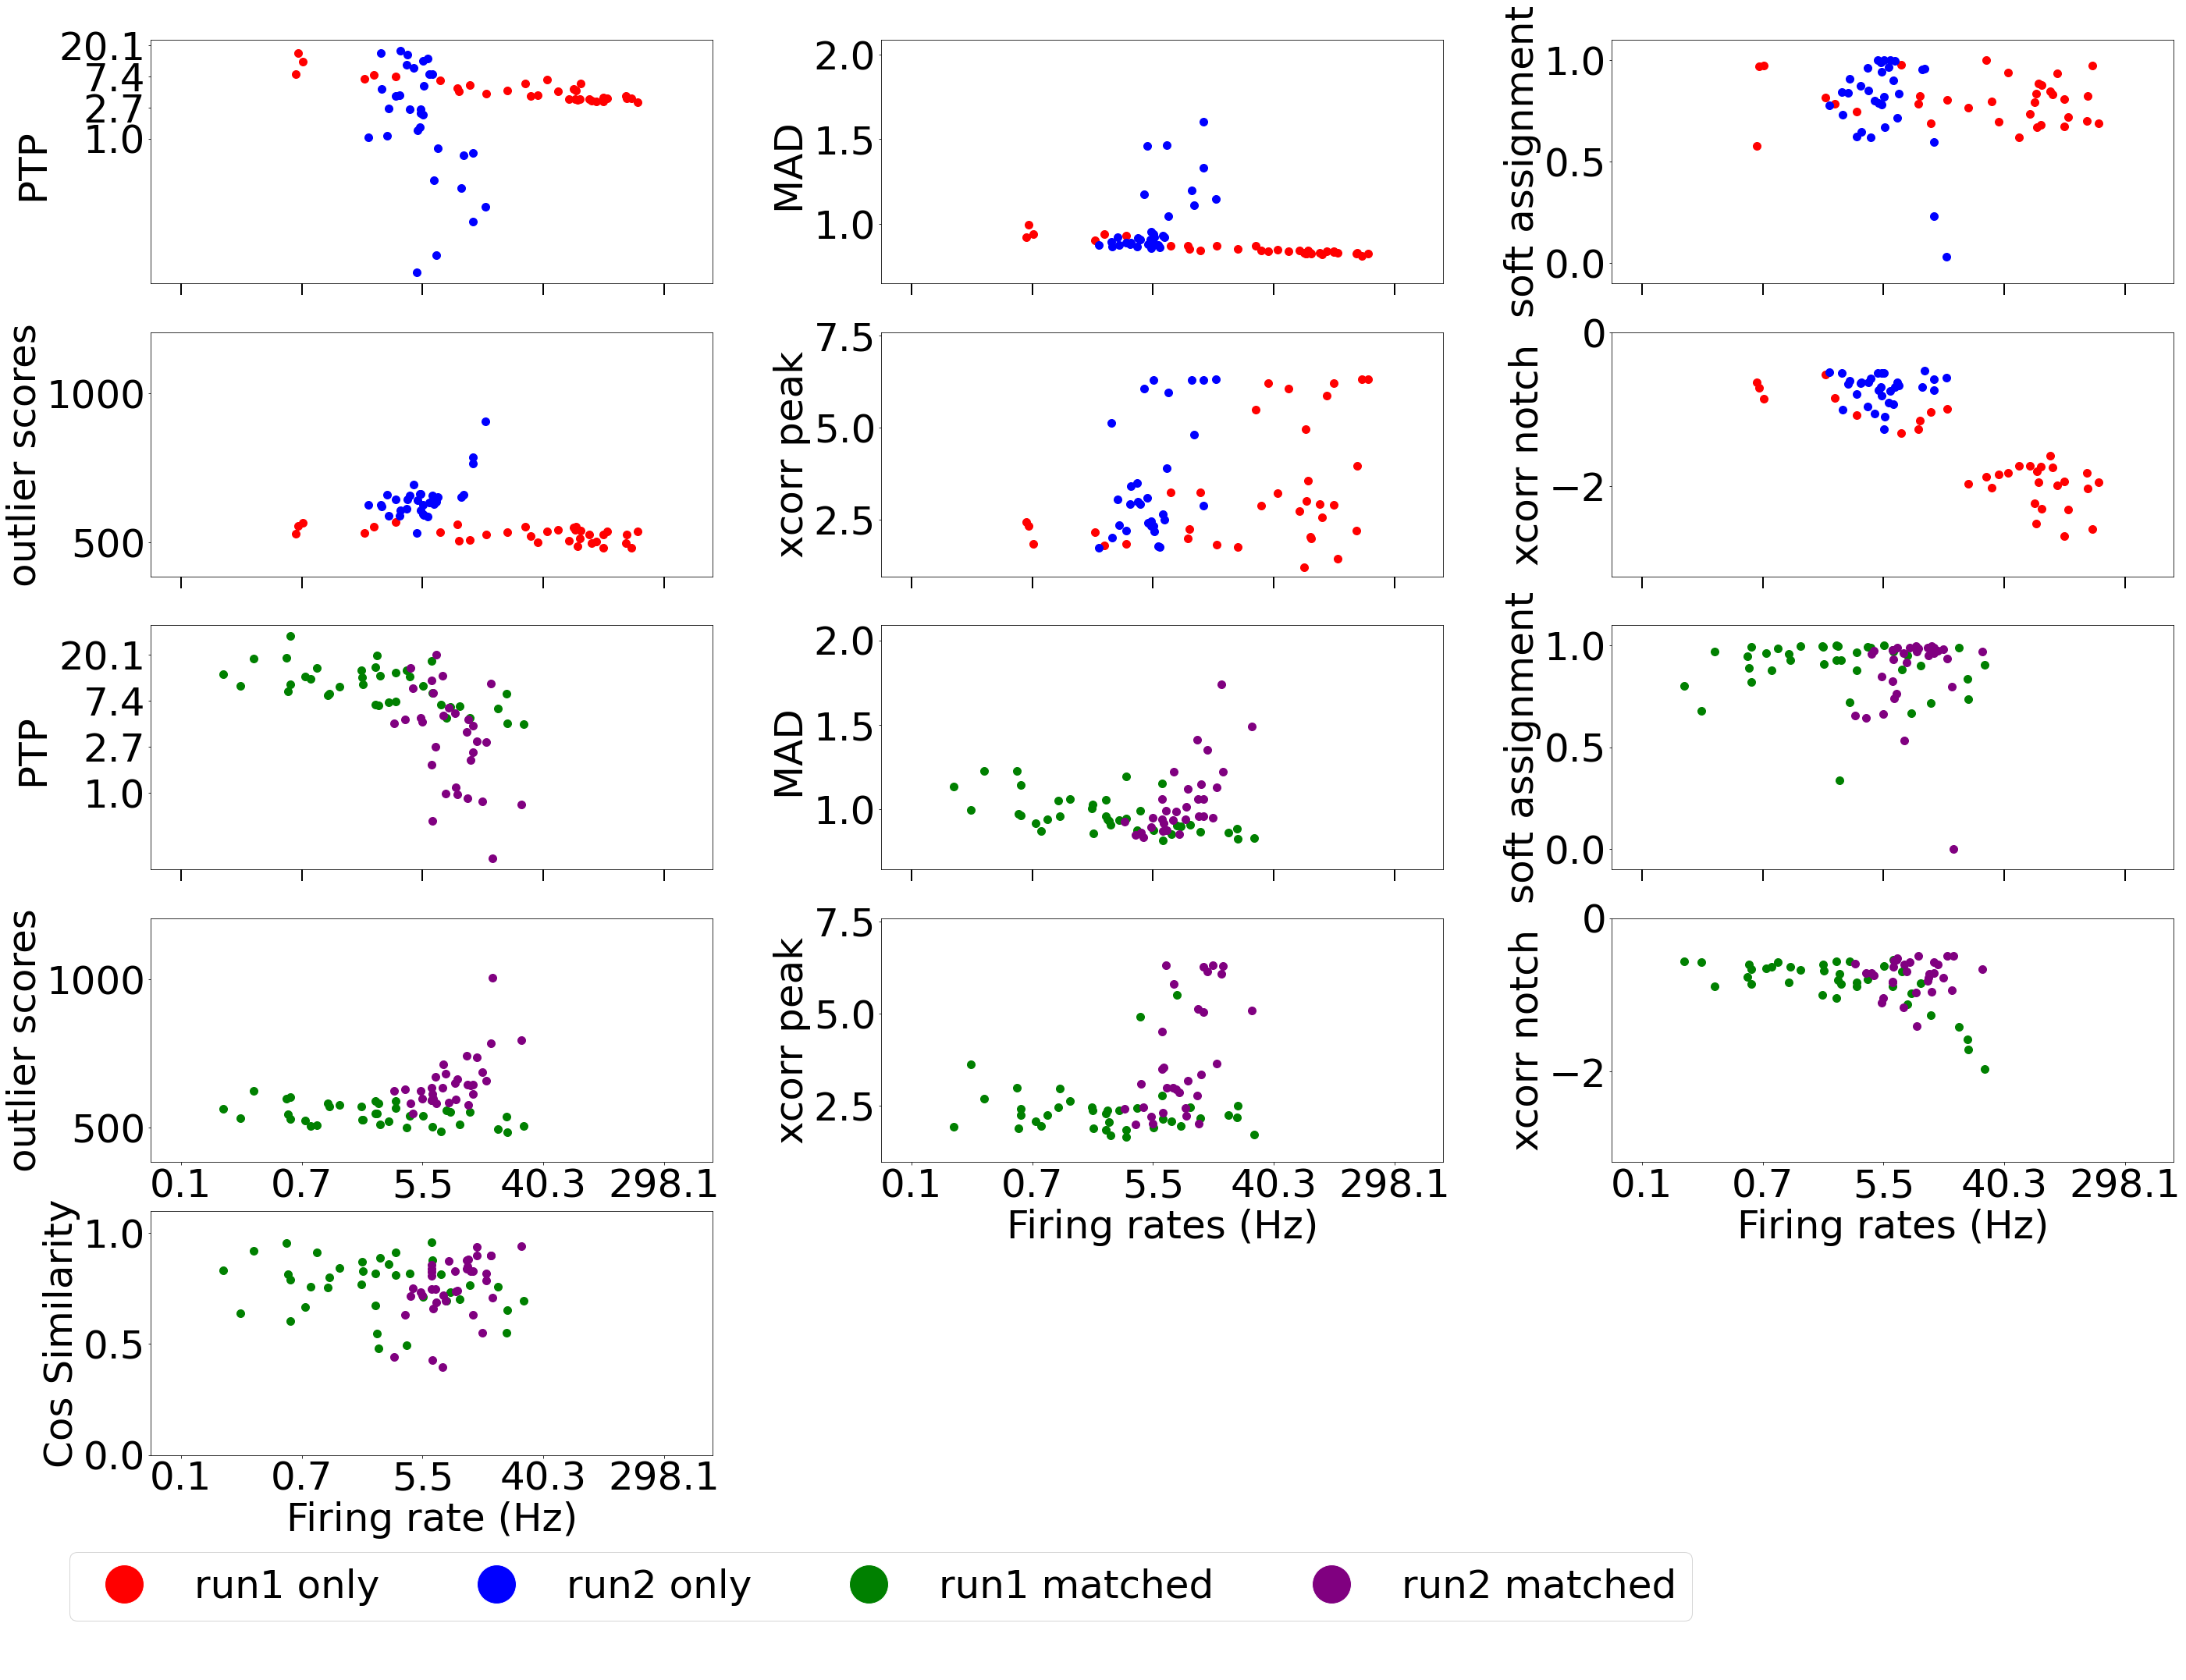

In [9]:
## We can now make comparison plots

cr.make_figures(use_ptp=False)

31 38


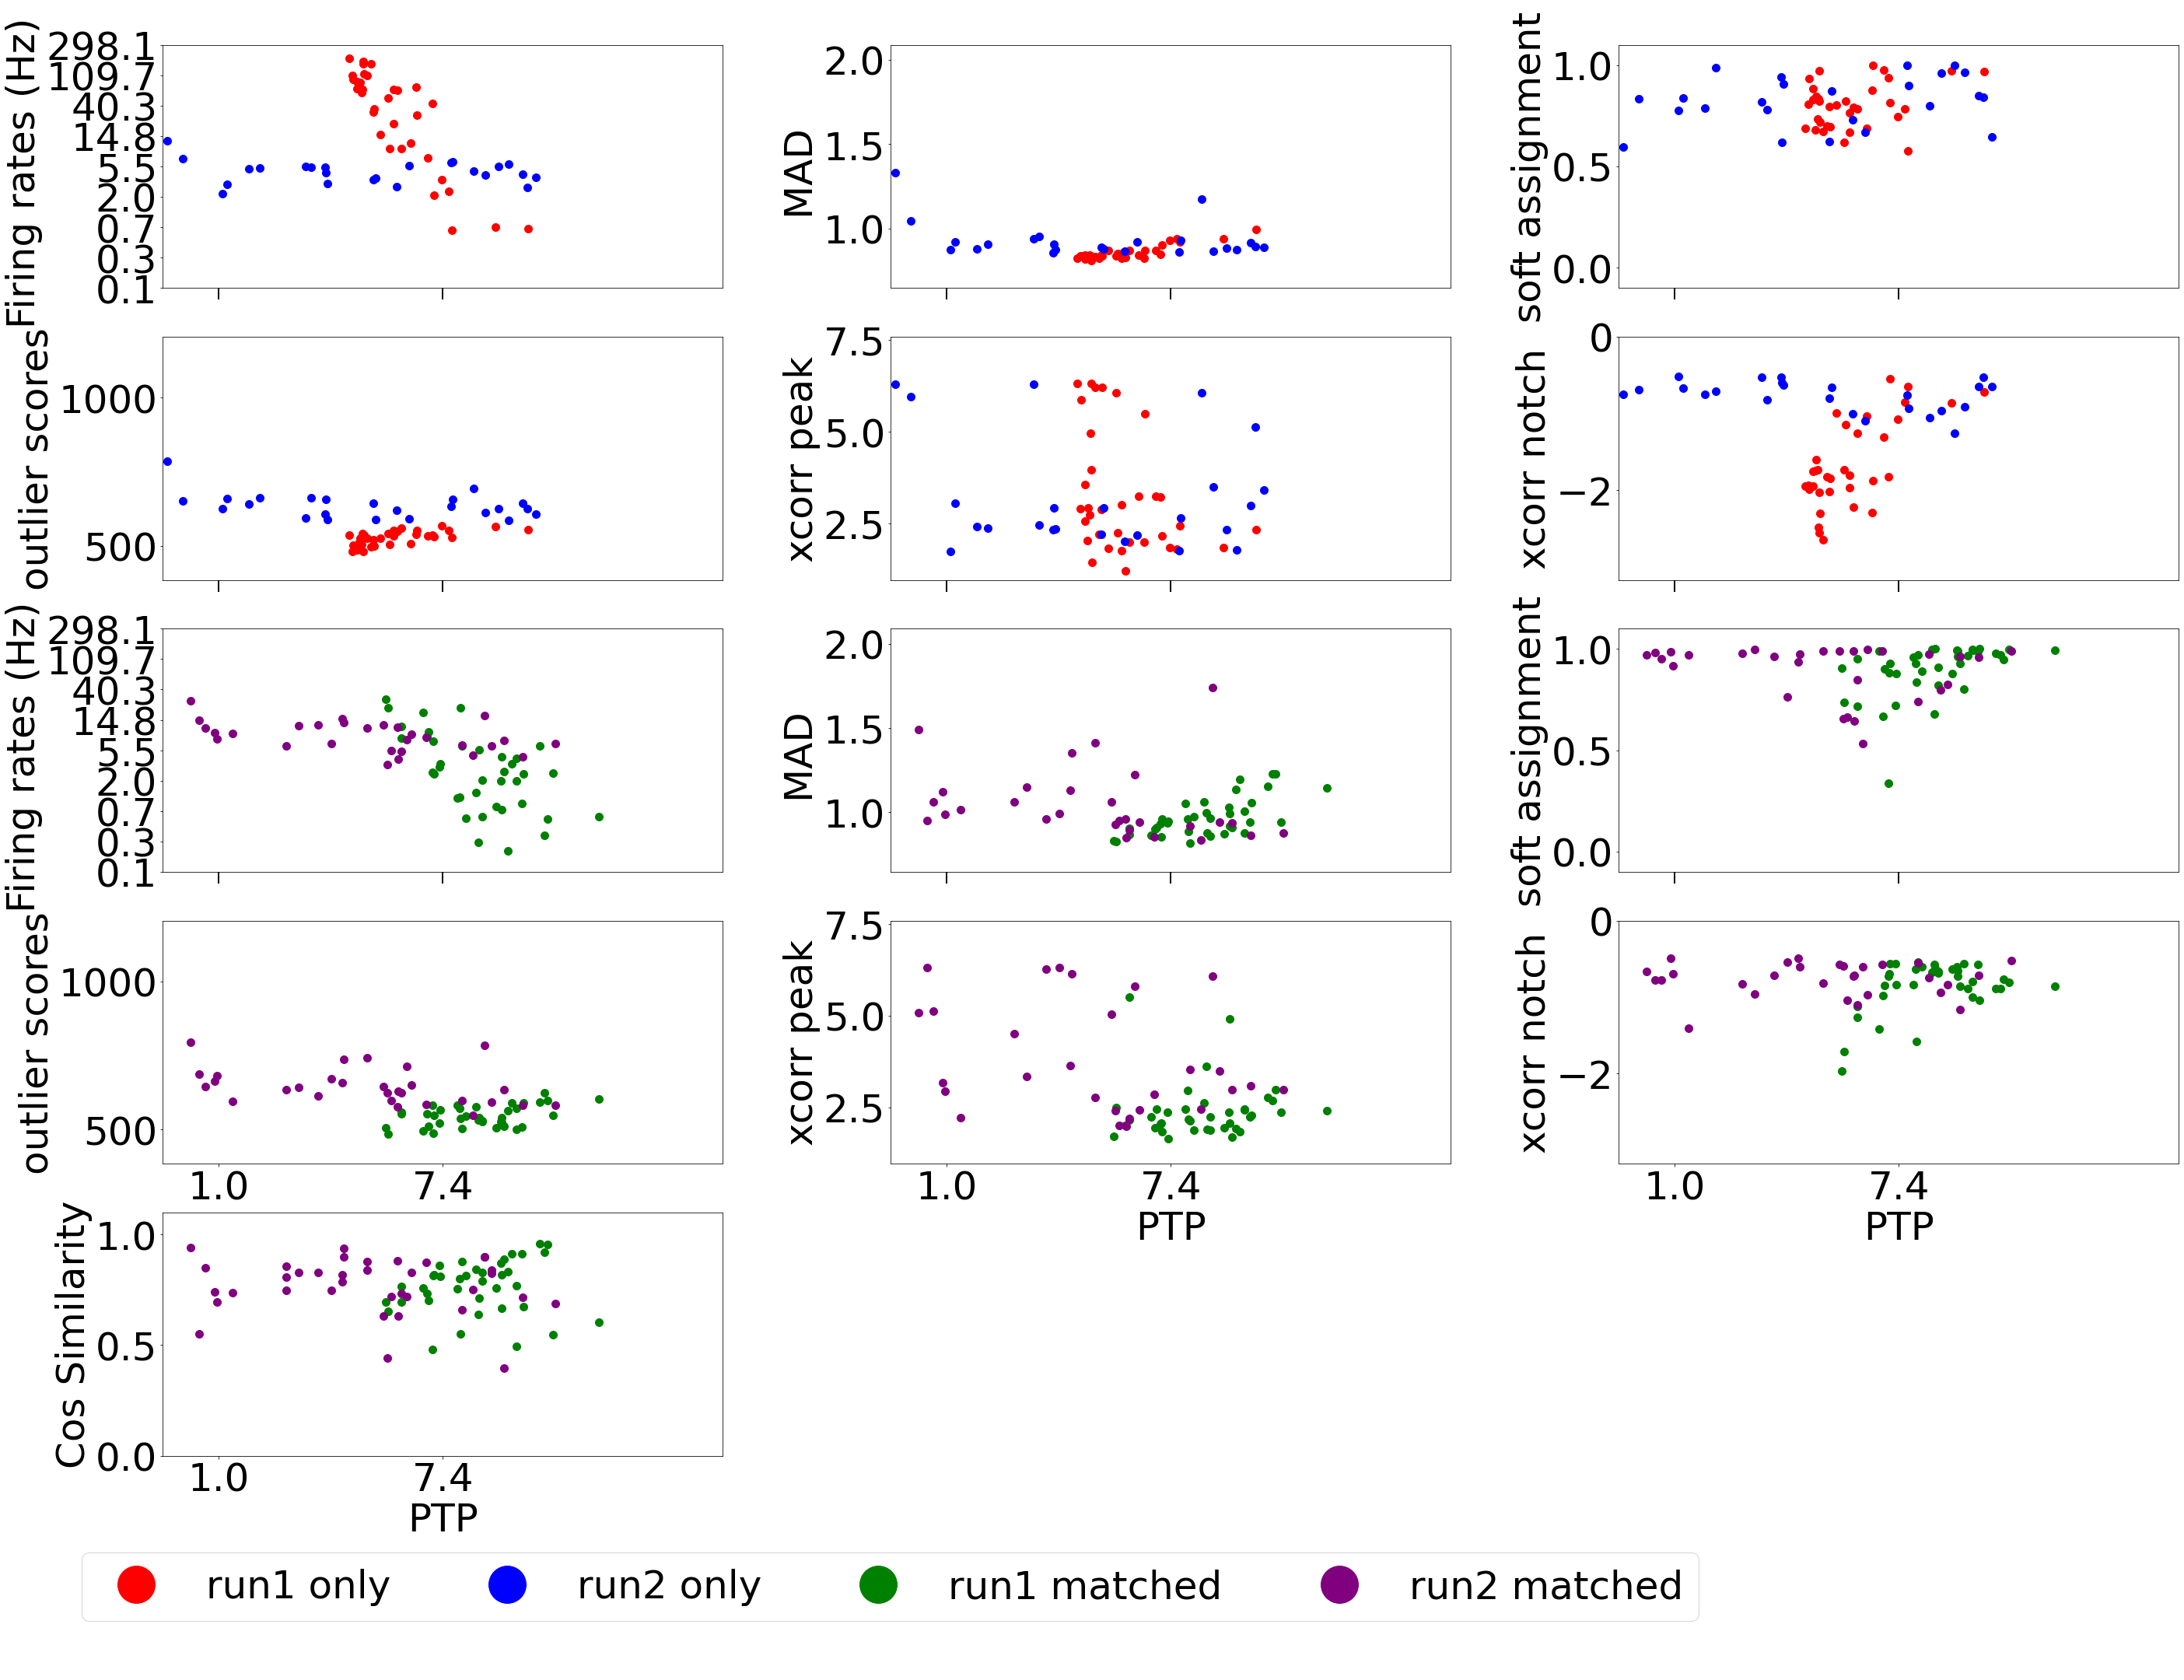

In [10]:
cr.make_figures(use_ptp=True)

In [16]:
cr.venn_plots(find_other_units = False)   ## default for find other units is set to True. 
                                          ## If True it'll find other nearby units of interest (Not yet in)


100%|██████████| 38/38 [07:07<00:00, 11.25s/it]


<Figure size 720x2736 with 0 Axes>